In [1]:
!pip install matplotlib==3.5.2

In [1]:
import matplotlib.pyplot as plt
from matplotlib.scale import LogScale
from typing import Dict, Any, List
import numpy as np 

# TODO: Run experiments for other models.

In [2]:
def save_fig(save_path: str):
    plt.savefig(save_path, bbox_inches="tight", dpi=600)

def _plot_scaling_performance(
    experiments: Dict[str, Dict[str, Any]],
    node_range: List[int],
) -> None:


    fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
    plt.ylabel("Performance (samples/sec)", fontsize=16)
    plt.xlabel("Number of Nodes", fontsize=16)
    
    # We change the fontsize of tick labels 
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='both', which='minor', labelsize=16)
    # Add top and right tick marks
    ax.tick_params(top=True, right=True, direction="in")
    
    # Set axis scale
    x_scalar = LogScale(ax, base=2)
    y_scalar = LogScale(ax, base=10)
    ax.set_xscale(x_scalar)
    ax.set_yscale(y_scalar)

        
    for name, experiment in experiments.items():
        
        marker = experiment["marker"]
        color = experiment["color"]
        nodes = experiment["nodes"]
        throughputs = experiment["thoughputs"]
        
        ideal = [throughputs[0]]
        for i in range(1, len(nodes)): 
            factor = nodes[i] // nodes[i-1]
            new_val = ideal[i-1] * factor 
            ideal.append(new_val)

        plt.plot(nodes, throughputs, c=color, marker=marker, markersize=10, label=name)
        plt.plot(nodes, ideal, linestyle="dashed", c=color, linewidth=1)

    # Label x axis and set label locations
    ax.set_xticks(node_range)
    ax.set_xticklabels(node_range)

    # Set legend
    plt.legend(loc="lower right")
    
def plot_scaling_performance(
    experiments: Dict[str, Dict[str, Any]],
    node_range: List[int],
) -> None:
    with plt.style.context('seaborn-poster'):
        plt.rcParams["font.family"] = "avenir"
        _plot_scaling_performance(experiments, node_range)

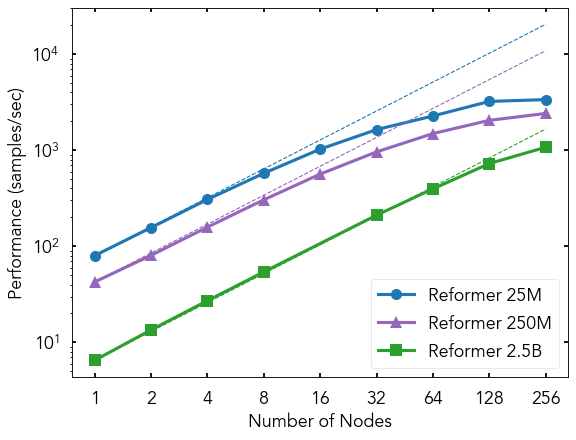

In [12]:
experiments = {
    "Reformer 25M": {
        "color": "tab:blue",
        "marker": "o",
        "nodes": [1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0],
        "thoughputs": [80.081, 156.657, 307.445, 576.249, 1027.873, 1641.973, 2275.963, 3226.762, 3371.091],
    },
    "Reformer 250M": {
        "color": "tab:purple",
        "marker": "^",
        "nodes": [1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0],
        "thoughputs": [42.57, 80.546, 158.595, 305.066, 565.139, 962.113, 1493.05, 2050.49, 2416.772],
    },
    "Reformer 2.5B": {
        "color": "tab:green",
        "marker": "s",
        "nodes": [1.0, 2.0, 4.0, 8.0, 32.0, 64.0, 128.0, 256.0], 
        "thoughputs": [6.498, 13.482, 27.133, 54.161, 210.943, 396.31, 727.133, 1075.22],
    },
}

node_range = [1, 2, 4, 8, 16, 32, 64, 128, 256]

plot_scaling_performance(experiments, node_range)
save_fig("figures/perlmutter-reformer-scaling.png")
plt.show()

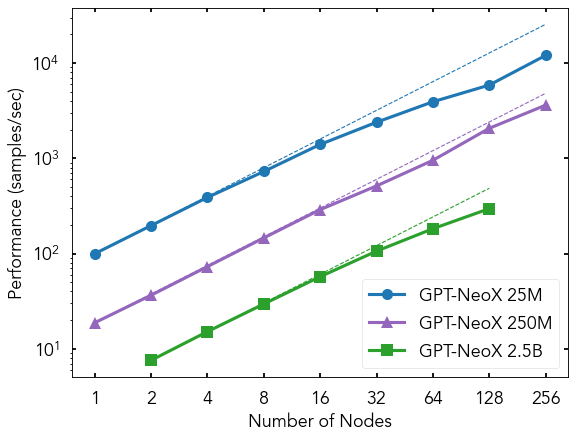

In [13]:
experiments = {
    "GPT-NeoX 25M": {
        "color": "tab:blue",
        "marker": "o",
        "nodes": [1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0],
        "thoughputs": [99.69, 196.89, 388.69, 727.55, 1399.26, 2393.12, 3924.46, 5877.20, 12038.14],
    },
    "GPT-NeoX 250M": {
        "color": "tab:purple",
        "marker": "^",
        "nodes": [1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0],
        "thoughputs": [18.8, 36.57, 73.03, 146.14, 289.31, 513.41, 954.06, 2067.22, 3616.43],
    },
    "GPT-NeoX 2.5B": {
        "color": "tab:green",
        "marker": "s",
        "nodes": [ 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0], 
        "thoughputs": [7.58, 15.18, 29.59, 57.24, 106.18, 182.48, 296.30],
    },
}

node_range = [1, 2, 4, 8, 16, 32, 64, 128, 256]

plot_scaling_performance(experiments, node_range)
save_fig("figures/polaris-gptneox-scaling.png")
plt.show()

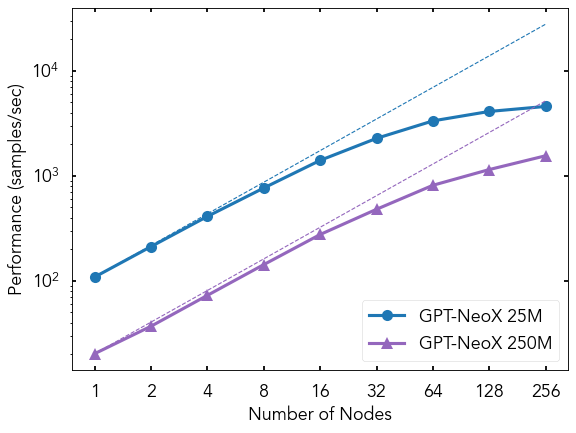

In [3]:
experiments = {
    "GPT-NeoX 25M": {
        "color": "tab:blue",
        "marker": "o",
        "nodes": [1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0],
        "thoughputs": [108.729, 212.008, 410.799, 766.326, 1404.293, 2275.304, 3336.852, 4105.119, 4581.867],
    },
    "GPT-NeoX 250M": {
        "color": "tab:purple",
        "marker": "^",
        "nodes": [1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0],
        "thoughputs": [20.232, 36.934, 72.720, 142.722, 276.09, 480.087, 812.663, 1147.558, 1552.699],
    },
    # "GPT-NeoX 2.5B": {
    #     "color": "tab:green",
    #     "marker": "s",
    #     "nodes": [ 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0], 
    #     "thoughputs": [],
    # },
}

node_range = [1, 2, 4, 8, 16, 32, 64, 128, 256]

plot_scaling_performance(experiments, node_range)
save_fig("figures/perlmutter-gptneox-scaling.png") # With non-virtual HDF5
plt.show()

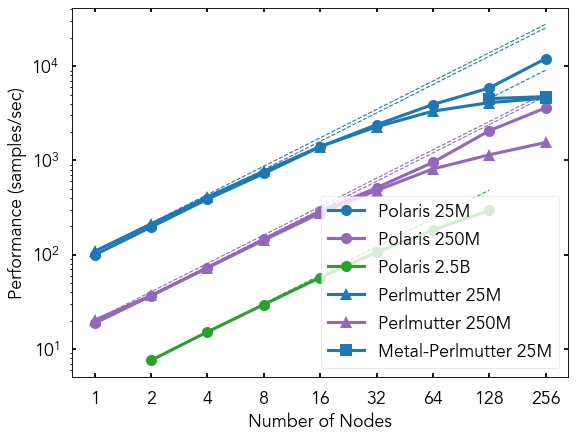

In [9]:
experiments = {
    "Polaris 25M": {
        "color": "tab:blue",
        "marker": "o",
        "nodes": [1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0],
        "thoughputs": [99.69, 196.89, 388.69, 727.55, 1399.26, 2393.12, 3924.46, 5877.20, 12038.14],
    },
    "Polaris 250M ": {
        "color": "tab:purple",
        "marker": "o",
        "nodes": [1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0],
        "thoughputs": [18.8, 36.57, 73.03, 146.14, 289.31, 513.41, 954.06, 2067.22, 3616.43],
    },
    "Polaris 2.5B": {
        "color": "tab:green",
        "marker": "o",
        "nodes": [ 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0], 
        "thoughputs": [7.58, 15.18, 29.59, 57.24, 106.18, 182.48, 296.30],
    },
    "Perlmutter 25M": {
        "color": "tab:blue",
        "marker": "^",
        "nodes": [1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0],
        "thoughputs": [108.729, 212.008, 410.799, 766.326, 1404.293, 2275.304, 3336.852, 4105.119, 4581.867],
    },
    "Perlmutter 250M": {
        "color": "tab:purple",
        "marker": "^",
        "nodes": [1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0],
        "thoughputs": [20.232, 36.934, 72.720, 142.722, 276.09, 480.087, 812.663, 1147.558, 1552.699],
    },
    "Metal-Perlmutter 25M": {
        "color": "tab:blue",
        "marker": "s",
        "nodes": [128.0, 256.0],
        "thoughputs": [4534.711, 4752.182],
    },
}

node_range = [1, 2, 4, 8, 16, 32, 64, 128, 256]

plot_scaling_performance(experiments, node_range)
#save_fig("figures/polaris-gptneox-scaling.png")
plt.show()

In [ ]:
# 673 samples/second for seqlength 10240 for 25M on 128 nodes (Polaris)